# review text analysis

In [7]:
import pandas as pd
import matplotlib.pyplot as plt 

In [8]:
# I had to use the special character r before the file path in order to make it work
reviews = pd.read_csv(r'D:\MEGA\Data Science\Springboard data science beginner - PYTHON\reviews_filtered.csv')

In [9]:
reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,FdoBFTjXXMn4hVnJ59EtiQ,eLAYHxHUutiXswy-CfeiUw,WQFn1A7-UAA4JT5YWiop_w,1,0,0,0,"They NEVER seem to get our \norder correct, se...",2017-09-08 23:26:10
1,DS4kN9ph17evKTUu0I3heQ,1hrlsEQ8l43jK4aXqQknGg,wVlxPWwFL-MrzCXim-UfWg,5,0,0,0,We had lunch there on a Sunday afternoon and i...,2018-05-08 17:14:19
2,J4LVJg82TjwJmjJvwwJcOg,EdJoFvhyRQnnGW7DT3ZLQA,HUEZLPIM64cDZnfHE1H3AA,5,0,0,0,its the best pizza hut i'v found in florida al...,2008-09-29 09:33:04
3,Z4IC8fBQwx8Y7QaiEt4OGA,yjkkzv-SHfS_jT25hWXi3g,VWuI68p6Ao_ENKaCGRazLA,4,0,0,0,Jacks is the place to be. \nThe food is except...,2013-12-28 22:24:14
4,ksRo7U-FzZ2HLfI48nfUZA,_zsiwKQoiAK6KiPUho1hFQ,1BvysshfkDS2eJ0k8XiDjQ,5,0,0,0,"Stopped in for lunch, was pleasantly surprised...",2017-07-08 18:43:41


In [10]:
# let's check what the first review (1 star) says
reviews.loc[0, 'text']

'They NEVER seem to get our \norder correct, service is crappy, food is inconsistent and has gone down hill steadily in the last 6-9 months! WILL NEVER GO THERE AGAIN!'

In [11]:
# let's check what the second review (5 stars) says
reviews.loc[1, 'text']

'We had lunch there on a Sunday afternoon and it was great.  We ordered 2 gluten free pizzas and both were uniquely delicious!  The service was great and it was an overall fantastic experience.  Will definitely be back.'

In [12]:
# checking the 'stars' column to analyze how those ratings are distributed
reviews['stars'].describe()

count    479303.000000
mean          3.668083
std           1.431841
min           1.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: stars, dtype: float64

In [13]:
star_counts = reviews['stars'].value_counts()
star_counts

5    190675
4    118975
1     67397
3     56939
2     45317
Name: stars, dtype: int64

<AxesSubplot:>

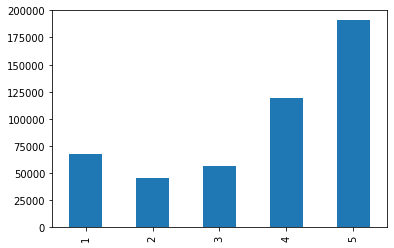

In [14]:
# create a bar plot of number of reviews for each star rating
# sort_index() may be useful to get the x-axis in the most intuitive order (ascending order)
star_counts.sort_index().plot(kind='bar')

In [15]:
# filtering the text from the 5 star reviews
good_review_text = reviews.loc[reviews['stars'] == 5, 'text']

In [16]:
# filtering the text from the 1, 2 and 3 star reviews
bad_review_text = reviews.loc[reviews.stars.isin([1, 2, 3]), 'text']

In [17]:
# now let's check how many rows each new variable created has

In [18]:
good_review_text.shape

(190675,)

In [19]:
bad_review_text.shape

(169653,)

In [20]:
# we have a lot of reviews in our hands
# at first we will select the first 1000 on the assumption they are randomly ordered and chain the str.lower() method to convert all string to lower case
# with this we will not count 'bad' and 'Bad' 

In [21]:
good_review_text = good_review_text.iloc[:1000].str.lower()
bad_review_text = bad_review_text.iloc[:1000].str.lower()

In [22]:
# checking the first few good reviews
good_review_text.head() 

1    we had lunch there on a sunday afternoon and i...
2    its the best pizza hut i'v found in florida al...
4    stopped in for lunch, was pleasantly surprised...
5    my husband and i tried to get in before they w...
9    after hearing great things for months, i decid...
Name: text, dtype: object

In [23]:
# checking the first bad reviews
bad_review_text.head()

0     they never seem to get our \norder correct, se...
6     the food has always been good, always. the ser...
7     it honestly takes them forever to bring food a...
8     went there last night and was disappointed aga...
17    i do not recommend this place at all when we a...
Name: text, dtype: object

In [24]:
# as of right now we have partitioned the good and the bad reviews
# now we have to analyze what makes a good review good and what make a bad review bad
# what are the most frequent words used in these types of reviews
# for that we are going to the import WordCloud, STOPWORDS, ImageColorGenerator from wordcloud 

In [25]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [26]:
good_text = " ".join(review for review in good_review_text)
bad_text = " ".join(review for review in bad_review_text)

In [27]:
# now it's time to create the first word cloud
good_wordcloud = WordCloud(max_words=50, background_color='white').generate(good_text)

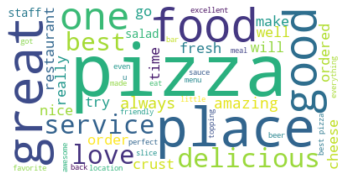

In [28]:
plt.imshow(good_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [29]:
# now it's time to create the second word cloud
bad_wordcloud = WordCloud(max_words=50, background_color='white').generate(bad_text)

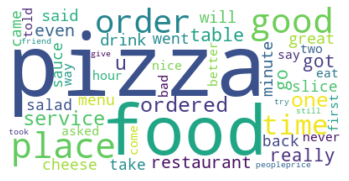

In [30]:
plt.imshow(bad_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# pizza, food, place, order are very common words and appear on both images
# we are going to add more stopwords to make a clearer picture for the good word cloud

In [36]:
new_stopwords = set(['pizza', 'food', 'order', 'place'])

In [37]:
# updating the stopwords with the bad_stopwords variable
stopwords = set(STOPWORDS)
stopwords.update(new_stopwords)

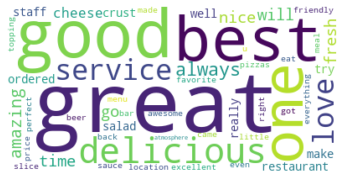

In [38]:
good_wordcloud_updated = WordCloud(stopwords = stopwords, background_color='white', max_words=50).generate(good_text)
plt.imshow(good_wordcloud_updated, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# the use of single words is a good start for analysis but words occur in sequences and those sequences can have much more meaning
# for that approach the use on bi-grams, tri-grams or n-grams is the tool we would implement for a better sentiment analysis of the restaurant reviews